# GRADE PREDICTION OF HOUSES

The objective of the project is to predict the grade of a house. We are provided with a dataset 7000 houses and their various features along with the Grades assigned to them. Using Machine Learning algorithms, we try to predict the Grades of houses that are new to the model.

In [412]:
# load libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
import random

pd.set_option('display.max_columns',None)

In [413]:
#Loading data
train=pd.read_csv("C:/users/ashwin/Desktop/HACKATHON/TRAINING.csv")
test=pd.read_csv("C:/users/ashwin/Desktop/HACKATHON/TEST.csv")

In [414]:
#Check the dimensions of the dataset
train.shape,test.shape

((7000, 14), (3299, 13))

In [415]:
#Combining the data to simplify manipulations
data=pd.concat([train,test],axis=0).reset_index(drop=True)

In [416]:
#create a copy of the original data
rawdata=data.copy()

In [417]:
data.head()

,ANB,API,Area(total),EXPECTED,Grade,Lawn(Area),Nbedrooms,Nbwashrooms,Nfloors,Roof(Area),Troom,Twashrooms,id,roof
0,4,63.0,305,3826$,D,76.0,2.0,1.0,2,0.0,8.0,3.0,1,NO
1,1,97.0,344,4458$,B,83.0,7.0,7.0,7,0.0,6.0,8.0,2,no
2,4,88.0,294,4199$,C,78.0,4.0,3.0,1,97.0,8.0,4.0,3,yes
3,1,86.0,328,3462$,D,91.0,4.0,2.0,5,0.0,5.0,4.0,4,NO
4,3,93.0,295,4543$,C,97.0,5.0,3.0,4,NaN,9.0,5.0,5,NaN


####  UNDERSTANDING THE DATA

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 14 columns):
ANB            10299 non-null int64
API            10297 non-null float64
Area(total)    10299 non-null int64
EXPECTED       10299 non-null object
Grade          7000 non-null object
Lawn(Area)     10296 non-null float64
Nbedrooms      10295 non-null float64
Nbwashrooms    10296 non-null float64
Nfloors        10299 non-null int64
Roof(Area)     8293 non-null float64
Troom          10296 non-null float64
Twashrooms     10298 non-null float64
id             10299 non-null int64
roof           8293 non-null object
dtypes: float64(7), int64(4), object(3)
memory usage: 1.1+ MB


In [419]:
data.describe(include=['object'])

,EXPECTED,Grade,roof
count,10299,7000,8293
unique,2198,5,4
top,3982$,C,no
freq,17,2928,2100


Expected price is under the object category. Expected price is numerical and thus we should treat it to make it numerical.
The dollar sign has to be removed.

In [420]:
data.describe(exclude=['object'])

,ANB,API,Area(total),Lawn(Area),Nbedrooms,Nbwashrooms,Nfloors,Roof(Area),Troom,Twashrooms,id
count,10299.000000,10297.000000,10299.000000,10296.000000,10295.000000,10296.000000,10299.000000,8293.000000,10296.000000,10298.000000,10299.000000
mean,3.494320,79.029038,325.002913,90.013112,4.995435,4.005245,4.508690,47.223321,7.002525,5.501457,2907.743470
std,1.699177,11.839374,20.481697,11.824232,1.644379,1.581207,1.815055,48.847327,1.419969,1.495858,1952.376099
min,1.000000,59.000000,290.000000,70.000000,2.000000,1.000000,1.000000,0.000000,5.000000,3.000000,1.000000
25%,2.000000,69.000000,307.000000,80.000000,4.000000,3.000000,3.000000,0.000000,6.000000,4.000000,1288.000000
50%,3.000000,79.000000,325.000000,90.000000,5.000000,4.000000,5.000000,0.000000,7.000000,6.000000,2575.000000
75%,5.000000,89.000000,342.000000,100.000000,6.000000,5.000000,6.000000,95.000000,8.000000,7.000000,4425.500000
max,6.000000,99.000000,360.000000,110.000000,8.000000,7.000000,8.000000,120.000000,9.000000,8.000000,7000.000000


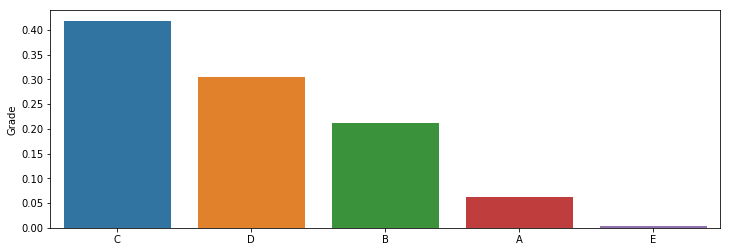

In [421]:
# Visualizing the distribtution of the target variable
plt.figure(1,figsize=(12,4))
sns.barplot(x=data['Grade'].value_counts(normalize=True).index,y=data['Grade'].value_counts(normalize=True))

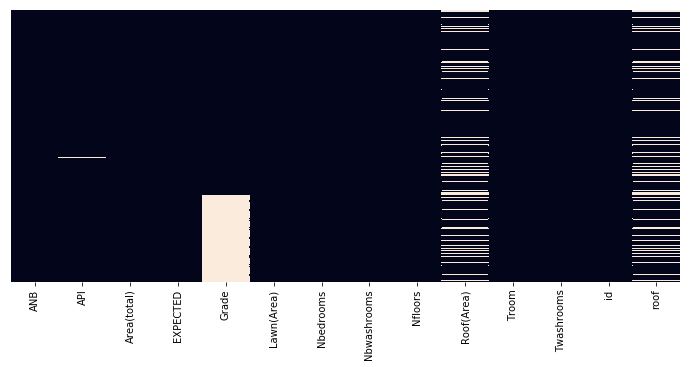

In [422]:
# Visualizing the missing values in each column
plt.figure(figsize=(12,5))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [423]:
# Missing value count in each variable
data.isnull().sum().sort_values(ascending=False)

Grade          3299
roof           2006
Roof(Area)     2006
Nbedrooms         4
Troom             3
Nbwashrooms       3
Lawn(Area)        3
API               2
Twashrooms        1
id                0
Nfloors           0
EXPECTED          0
Area(total)       0
ANB               0
dtype: int64

In [424]:
# Converting the Expected Price column into a numerical variable
data['EXPECTED']=data['EXPECTED'].apply(lambda x: str.replace(x,x[4],''))
data['EXPECTED']=data['EXPECTED'].astype(int)

## VARIABLES ANALYSIS

### CATEGORICAL VARIABLES

Text(0.5, 1.0, 'Total no. of rooms')

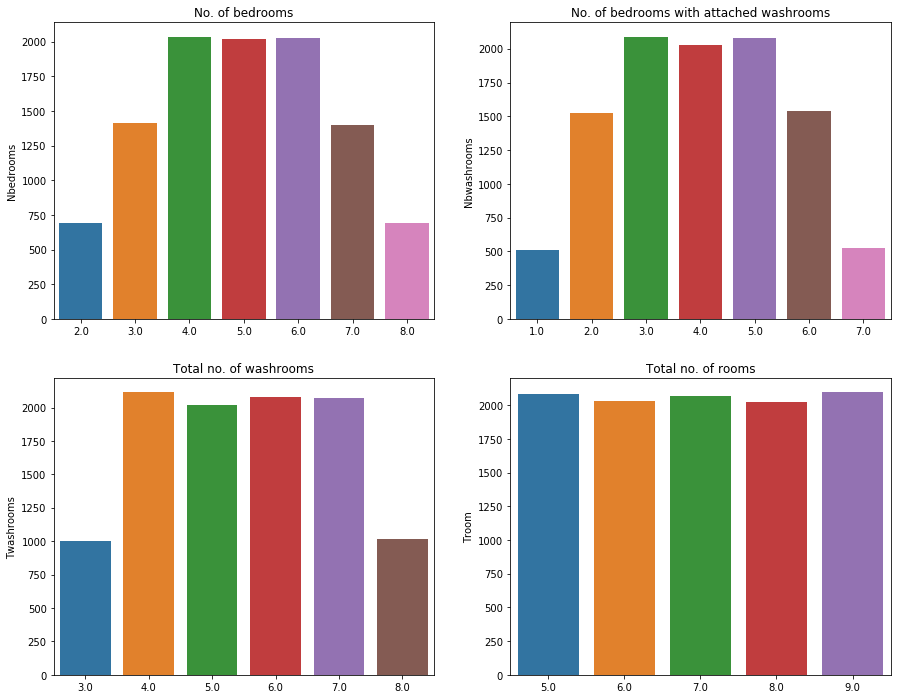

In [425]:
plt.figure(4,figsize=(15,12))

plt.subplot(221)
sns.barplot(x=data['Nbedrooms'].value_counts(normalize=False).index,y=data['Nbedrooms'].value_counts(normalize=False)).set_title('No. of bedrooms')

plt.subplot(222)
sns.barplot(x=data['Nbwashrooms'].value_counts(normalize=False).index,y=data['Nbwashrooms'].value_counts(normalize=False)).set_title('No. of bedrooms with attached washrooms')

plt.subplot(223)
sns.barplot(x=data['Twashrooms'].value_counts(normalize=False).index,y=data['Twashrooms'].value_counts(normalize=False)).set_title('Total no. of washrooms')

plt.subplot(224)
sns.barplot(x=data['Troom'].value_counts(normalize=False).index,y=data['Troom'].value_counts(normalize=False)).set_title('Total no. of rooms')

Text(0.5, 1.0, 'Roof')

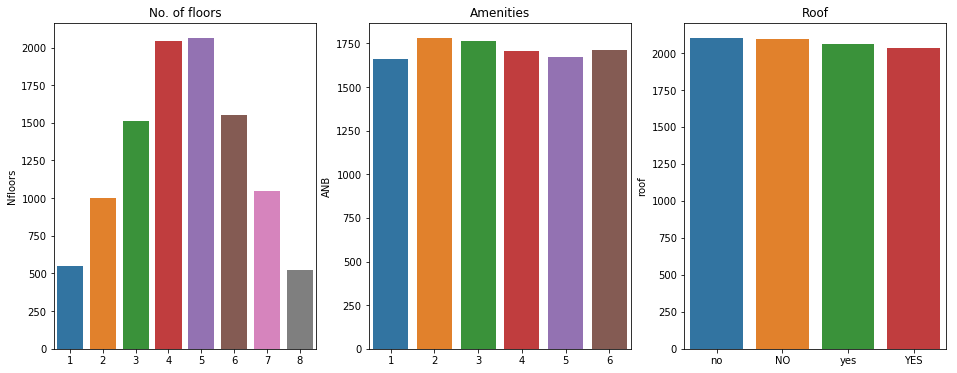

In [426]:
plt.figure(5,figsize=(16,6))

plt.subplot(131)
sns.barplot(x=data['Nfloors'].value_counts(normalize=False).index,y=data['Nfloors'].value_counts(normalize=False)).set_title('No. of floors')

plt.subplot(132)
sns.barplot(x=data['ANB'].value_counts(normalize=False).index,y=data['ANB'].value_counts(normalize=False)).set_title('Amenities')

plt.subplot(133)
sns.barplot(x=data['roof'].value_counts(normalize=False).index,y=data['roof'].value_counts(normalize=False)).set_title('Roof')

In [427]:
# Standardizing the levels in the variable
data['roof'][data['roof']=='no']='NO'
data['roof'][data['roof']=='yes']='YES'

Text(0.5, 1.0, 'Roof')

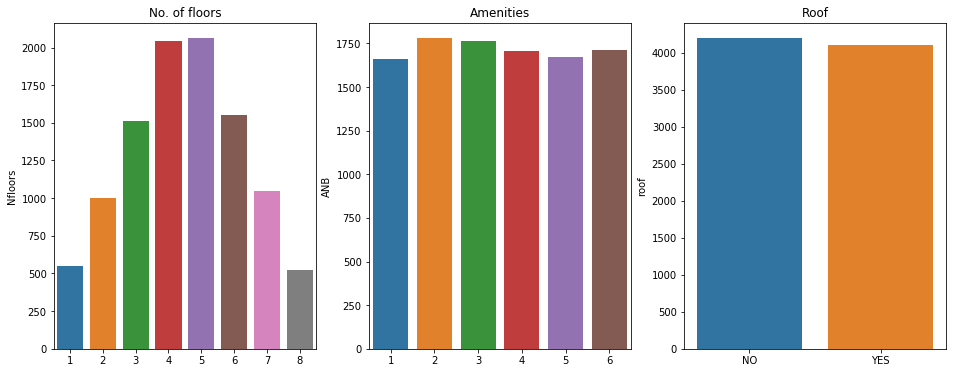

In [428]:
plt.figure(5,figsize=(16,6))

plt.subplot(131)
sns.barplot(x=data['Nfloors'].value_counts(normalize=False).index,y=data['Nfloors'].value_counts(normalize=False)).set_title('No. of floors')

plt.subplot(132)
sns.barplot(x=data['ANB'].value_counts(normalize=False).index,y=data['ANB'].value_counts(normalize=False)).set_title('Amenities')

plt.subplot(133)
sns.barplot(x=data['roof'].value_counts(normalize=False).index,y=data['roof'].value_counts(normalize=False)).set_title('Roof')

### NUMERICAL VARIABLES

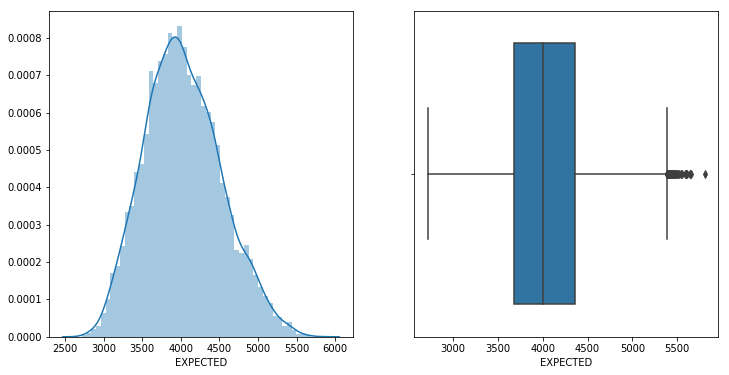

In [429]:
plt.figure(6,figsize=(12,6))

plt.subplot(121)
sns.distplot(data['EXPECTED'])

plt.subplot(122)
sns.boxplot(data['EXPECTED'])

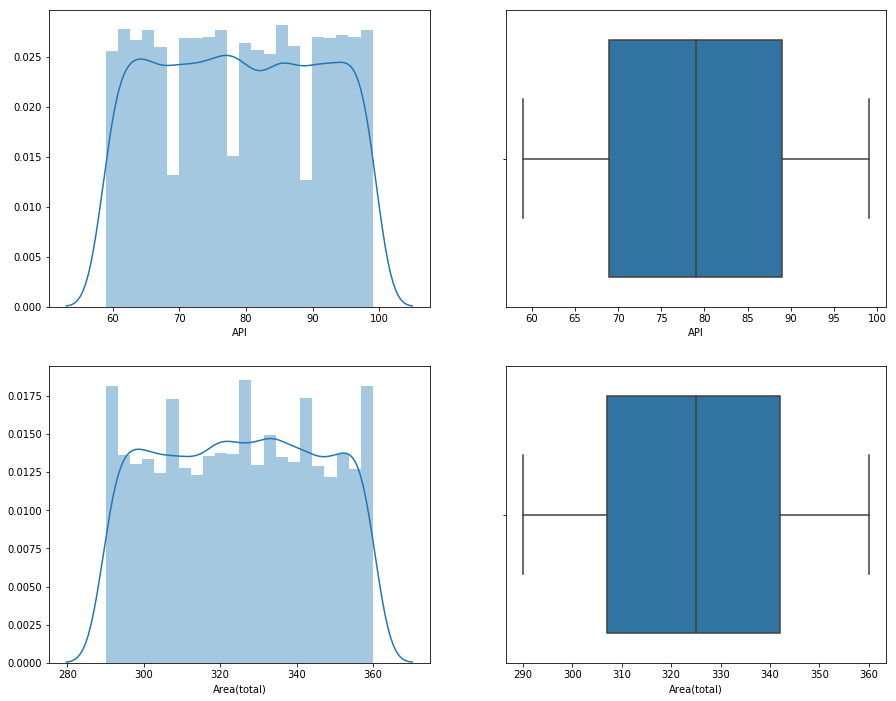

In [430]:
plt.figure(6,figsize=(15,12))

plt.subplot(221)
sns.distplot(data['API'].dropna())

plt.subplot(222)
sns.boxplot(data['API'])

plt.subplot(223)
sns.distplot(data['Area(total)'].dropna())

plt.subplot(224)
sns.boxplot(data['Area(total)'])

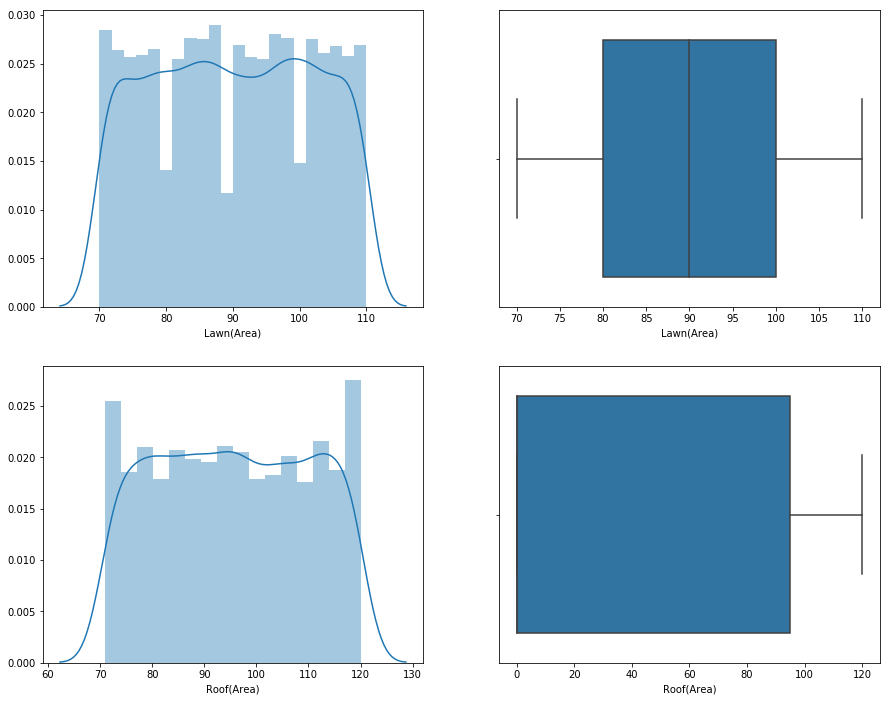

In [431]:
plt.figure(7,figsize=(15,12))

plt.subplot(221)
sns.distplot(data['Lawn(Area)'].dropna())

plt.subplot(222)
sns.boxplot(data['Lawn(Area)'])

plt.subplot(223)
sns.distplot(data['Roof(Area)'][data['Roof(Area)']>0].dropna())

plt.subplot(224)
sns.boxplot(data['Roof(Area)'])

## MISSING VALUE TREATMENT

In [432]:
# Fill missing value with the mode value of the variable
data['Twashrooms']=data['Twashrooms'].fillna(data['Twashrooms'].mode()[0])

In [433]:
# Fill missing value with the mean value of the variable
data['API']=data['API'].fillna(round(data['API'].mean()))

In [434]:
# Fill missing value with the mode value of the variable
data['Nbwashrooms']=data['Nbwashrooms'].fillna(data['Nbwashrooms'].mode()[0])

In [435]:
# Fill missing value with the mean value of the variable
data['Lawn(Area)']=data['Lawn(Area)'].fillna(round(data['Lawn(Area)'].mean()))

In [436]:
# Fill missing value with the mode value of the variable
data['Troom']=data['Troom'].fillna(data['Troom'].mode()[0])

In [437]:
# Fill the missing value of Nbedrooms with the number of bedrooms attached with washrooms
data['Nbedrooms'][data['Nbedrooms'].isnull()==True]=data['Nbwashrooms'][data['Nbedrooms'].isnull()==True]

We fill in the missing values in the Nbedrooms variable using the respective Nbwashrooms values as they make a better estimate of the minimum number of bedrooms available in the house.

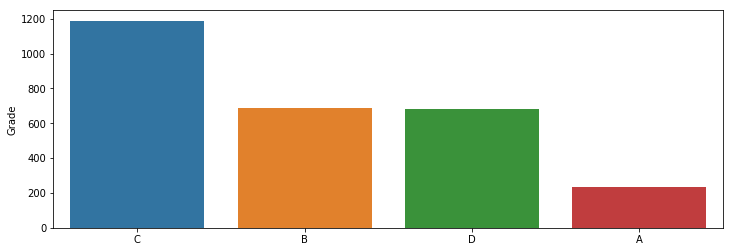

In [438]:
# Visualizing the Grades of houses with roofs

plt.figure(3,figsize=(12,4))
sns.barplot(x=data['Grade'][data['roof']=='YES'].value_counts().index,y=data['Grade'][data['roof']=='YES'].value_counts())

We find that houses with roofs are never assigned Grade E.

In [439]:
# Using the mean and std of the roof area variable to fill in the missing values
mean=round(data['Roof(Area)'][data['Roof(Area)']>0].mean())
std=round(np.std(data['Roof(Area)'][data['Roof(Area)']>0]))

In [440]:
# Mean and Standard Deviation of roof Area variable
mean,std

(96, 14)

In [441]:
# Getting the indices of those rows with missing roof value
rows=data[data['roof'].isnull()==True].index.values

In [442]:
# Filling the missing values of roof variable with randomly selected values
data['roof'][data['roof'].isnull()==True]=data['roof'][data['roof'].isnull()==True].apply(lambda x: random.choice(['NO','YES']))

In [443]:
# Getting the indices of those missing values that got fille with 'YES'

v=[]
for i in rows:
    if (data['roof'].iloc[i]=='YES'):
        v.append(i)

In [444]:
# For those filled with 'YES', fill the missing values of roof area with random values within one Std Dev from the mean
data['Roof(Area)'].iloc[v]=data['Roof(Area)'].iloc[v].apply(lambda x: random.randint(mean-std,mean+std))

In [445]:
# Filling the remaining missing values with 0
data['Roof(Area)']=data['Roof(Area)'].fillna(0)

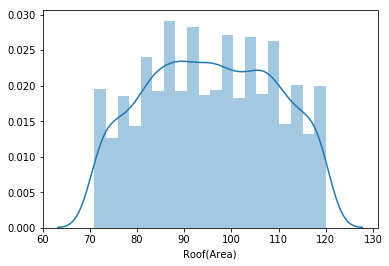

In [446]:
# Distribution of the roof area variable after missing value treatment
sns.distplot(data['Roof(Area)'][data['Roof(Area)']>0])

We fill in the missing values of roof variable using randomly selected values. Once filled, the roof(Area) variable corresponding to 'YES' is filled with random values with one std dev of the mean of the variable. roof(Area) corresponding to 'NO' is filled with 0. This maintains the normal distribution of the variable.

In [447]:
#Houses with only Grade A avaiable beyond 5200$
data['Grade'][data['EXPECTED']>5200].value_counts()

A    94
Name: Grade, dtype: int64

In [448]:
# Houses with Grade A and B not available below 3550$
data['Grade'][data['EXPECTED']<3550].value_counts()

D    995
C    118
E     26
Name: Grade, dtype: int64

As an insight, houses with expected price above USD5200 are only assigned grade A. Similarly, houses below the expected price of USD3550 are never assigned the grades A and B.

In [449]:
# Mapping catergorical values to numerical values
data['roof']=data['roof'].map({'NO':0,'YES':1})

In [450]:
# Seperating the target and the predictor variables
Y=data['Grade'].iloc[0:len(train)]
data=data.drop(['Grade','id'],axis=1)

In [451]:
data.head()

,ANB,API,Area(total),EXPECTED,Lawn(Area),Nbedrooms,Nbwashrooms,Nfloors,Roof(Area),Troom,Twashrooms,roof
0,4,63.0,305,3826,76.0,2.0,1.0,2,0.0,8.0,3.0,0
1,1,97.0,344,4458,83.0,7.0,7.0,7,0.0,6.0,8.0,0
2,4,88.0,294,4199,78.0,4.0,3.0,1,97.0,8.0,4.0,1
3,1,86.0,328,3462,91.0,4.0,2.0,5,0.0,5.0,4.0,0
4,3,93.0,295,4543,97.0,5.0,3.0,4,0.0,9.0,5.0,0


In [452]:
# Standardizing the variables using mean, max and min
data=(data-data.mean())/(data.max()-data.min())

In [453]:
data.head()

,ANB,API,Area(total),EXPECTED,Lawn(Area),Nbedrooms,Nbwashrooms,Nfloors,Roof(Area),Troom,Twashrooms,roof
0,0.101136,-0.400726,-0.285756,-0.067024,-0.350328,-0.499158,-0.500825,-0.358384,-0.396784,0.249223,-0.500262,-0.497815
1,-0.498864,0.449274,0.271387,0.137573,-0.175328,0.334175,0.499175,0.355901,-0.396784,-0.250777,0.499738,-0.497815
2,0.101136,0.224274,-0.442899,0.053727,-0.300328,-0.165825,-0.167492,-0.501241,0.411550,0.249223,-0.300262,0.502185
3,-0.498864,0.174274,0.042816,-0.184861,0.024672,-0.165825,-0.334159,0.070187,-0.396784,-0.500777,-0.300262,-0.497815
4,-0.098864,0.349274,-0.428613,0.165090,0.174672,0.000842,-0.167492,-0.072670,-0.396784,0.499223,-0.100262,-0.497815


In [454]:
# Splitting train and test data
TRAIN=data.iloc[0:len(train)]
TEST=data.iloc[len(train):]

In [455]:
TRAIN.shape,TEST.shape

((7000, 12), (3299, 12))

In [456]:
# One-hot encoding for the target variable to be used in Neural Network
dummy=pd.get_dummies(Y)

## MACHINE LEARNING MODELS

In [457]:
# Loading all required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

## LOGISTIC REGRESSION

In [68]:
# Running logistic regression using kfold validation for best estimator
kfold = KFold(n_splits=5, shuffle=True)
model=LogisticRegression(random_state=1,multi_class='multinomial')
solvers=['newton-cg', 'lbfgs', 'sag', 'saga']
max_iters=list(np.arange(100,1100,100))

params_lr=dict(solver=solvers,max_iter=max_iters)
grid_lr=GridSearchCV(model,params_lr,n_jobs=-1,cv=kfold)
grid_lr.fit(TRAIN,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
grid_lr.best_score_

0.8755714285714286

## DECISION TREE CLASSIFIER

In [78]:
# Running Decision Tree using kfold validation for best estimator
kfold = KFold(n_splits=5, shuffle=True)
dt=DecisionTreeClassifier(random_state=1)

paramsdt = {'max_depth': list(range(1, 20, 1)),'min_samples_split': [n for n in range(6, 15)], 
    'min_samples_leaf' : [n for n in range(4, 15)],'criterion':['gini','entropy']}

grid_dt=GridSearchCV(dt,paramsdt,n_jobs=-1,cv=kfold)
grid_dt.fit(TRAIN,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
grid_dt.best_score_

0.8142857142857143

## RANDOM FOREST CLASSIFIER

In [81]:
# Running Random Forest using kfold validation for best estimator
kfold = KFold(n_splits=5, shuffle=True)
rf=RandomForestClassifier(random_state=1)

paramsrf = {'max_depth': list(range(1, 20, 2)),'min_samples_split': [n for n in range(6, 15)], 
    'min_samples_leaf' : [n for n in range(4, 15)],
    'n_estimators':[n for n in range(10, 100, 10)]}

grid_rf=GridSearchCV(rf,paramsdt,n_jobs=-1,cv=kfold)
grid_rf.fit(TRAIN,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
grid_rf.best_score_

0.8585714285714285

## SUPPORT VECTOR MACHINE

In [532]:
# Running SVM using kfold validation for best estimator
kfold = KFold(n_splits=5, shuffle=True)
sv=SVC(random_state=1)

result=cross_val_score(sv, TRAIN, Y, cv=kfold,n_jobs=-1)

In [534]:
result.mean()

0.8964285714285716

## GRADIENT BOOSTING CLASSIFIER

In [528]:
# Running Gradient Boosting using kfold validation for best estimator
kfold = KFold(n_splits=5, shuffle=True)
gb=GradientBoostingClassifier(n_estimators=200, max_depth=6, random_state=1)

# paramsgb = {'max_depth': list(range(1, 20, 2)),'min_samples_split': [n for n in range(6, 15)], 
#     'min_samples_leaf' : [n for n in range(4, 15)],
#     'n_estimators':[n for n in range(10, 100, 10)],'loss':['deviance','exponential']}

result=cross_val_score(gb, TRAIN, Y, cv=kfold,n_jobs=-1)

In [529]:
result.mean()

0.886857142857143

## XTREME GRADIENT BOOSTING CLASSIFIER

In [530]:
# Running XG Boost using kfold validation for best estimator
kfold = KFold(n_splits=5, shuffle=True)
xgb=XGBClassifier(n_estimators=200, max_depth=6,random_state=1)

# paramsxgb = {'max_depth': list(range(1, 20, 2)),'min_samples_split': [n for n in range(6, 15)], 
#     'min_samples_leaf' : [n for n in range(4, 15)],
#     'n_estimators':[n for n in range(10, 100, 10)],'loss':['deviance','exponential']}

result=cross_val_score(xgb, TRAIN, Y, cv=kfold,n_jobs=-1)

In [531]:
result.mean()

0.8945714285714285

## NEURAL NETWORKS

### MLP CLASSIFIER

In [518]:
# # Running Neural Network by MLP Classifier using kfold validation

kfold=KFold(n_splits=3,random_state=1,shuffle=True)
model=MLPClassifier(random_state=1,solver='lbfgs',hidden_layer_sizes=(12,12,12),activation='tanh', alpha=1,max_iter=500,
                   batch_size=20)

result=cross_val_score(model, TRAIN, dummy,n_jobs=-1, cv=kfold)

In [519]:
result.mean()

0.935857466723426

In [366]:
# Fitting the model and predicting the values for the test dataset

model.fit(TRAIN, dummy)
pred=model.predict(TEST)

In [388]:
# Reverse Encoding of dummy variables
grade=pd.DataFrame(pred,columns=["A","B",'C','D','E'])

In [396]:
# Revere Encoding of dummy variables
pred_grades = grade.idxmax(axis=1)

In [399]:
# Creating csv output file
submission=pd.DataFrame({'id':test['id'],'Grade':pred_grades})
submission.to_csv("C:/users/ashwin/Desktop/sub.csv",index=False)

In [479]:
# Running Neural Network by MLP Classifier using kfold validation for best estimator
kfold=KFold(n_splits=3,random_state=1,shuffle=True)
model=MLPClassifier(solver='lbfgs',random_state=1)

params_nn={'hidden_layer_sizes': [(8,8),(10,10),(12,12),(13,13),(14,14),(10,10,10),(12,12,12),(15,15,15),(20,20,20)],
           'alpha': list(np.logspace(-5, 3, 5)),'activation': ["logistic", "relu", "tanh"],
           'max_iter':list(np.arange(100,2100,100))}

grid_nn=GridSearchCV(model,params_nn,n_jobs=-1,cv=kfold)
grid_nn.fit(TRAIN,dummy)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(8, 8), (10, 10), (12, 12), (13, 13), (14, 14), (10, 10, 10), (12, 12, 12), (15, 15, 15), (20, 20, 20)], 'alpha': [1e-05, 0.001, 0.1, 10.0, 1000.0], 'activation': ['logistic', 'relu', 'tanh'], 'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]},
       pre_dispa

In [480]:
grid_nn.best_score_

0.9367142857142857

In [481]:
grid_nn.best_params_

{'activation': 'tanh',
 'alpha': 10.0,
 'hidden_layer_sizes': (20, 20, 20),
 'max_iter': 1400}

In [482]:
# Using the parameters from GridSearch and creating the model
kfold=KFold(n_splits=3,random_state=1,shuffle=True)
model=MLPClassifier(solver='lbfgs',activation= 'tanh',alpha= 10,hidden_layer_sizes= (20, 20, 20),max_iter= 1400)

result=cross_val_score(model, TRAIN, dummy, cv=kfold)

In [483]:
result.mean()

0.935428834061617

In [484]:
# Fitting the model and predicting the values for the test dataset

model.fit(TRAIN, dummy)
pred=model.predict(TEST)

In [485]:
# Reverse Encoding of dummy variables
grade=pd.DataFrame(pred,columns=["A","B",'C','D','E'])

In [486]:
# Reverse Encoding of dummy variables
pred_grades = grade.idxmax(axis=1)

In [489]:
# Creating csv output file
# submission=pd.DataFrame({'id':test['id'],'Grade':pred_grades})
# submission.to_csv("C:/users/ashwin/Desktop/sub.csv",index=False)

### KERAS CLASSIFIER

In [520]:
# Running Neural Network by Keras Classifier using kfold validation for best estimator
kfold = KFold(n_splits=3, shuffle=True)
def baseline_model():
    model = Sequential()
    model.add(Dense(8, input_dim=12, activation='tanh'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(5, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model
estimator=KerasClassifier(build_fn=baseline_model, epochs=200,verbose=0)
result=cross_val_score(estimator, TRAIN, dummy, cv=kfold,n_jobs=-1)
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [10, 50, 100]
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid']
# neurons = [1, 5, 10, 15, 20]
# paramsnn=dict(epochs=epochs,batch_size=batch_size,activation=activation, neurons=neurons,
#               optimizer=optimizer,learn_rate=learn_rate)
# grid_nn = GridSearchCV(estimator=estimator, param_grid=paramsnn, n_jobs=-1, cv=kfold)
# grid_nn.fit(TRAIN,dummy)

In [521]:
result.mean()

0.8109908699989319

                                                    THE END